In [1]:
# Numpy and Pandas 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from math import sqrt

In [2]:
# Viz Lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
#import library for linear rigression model
import statsmodels.formula.api as smf


#import library for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

#import library for Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#import library for Random Forest model
from sklearn.ensemble import RandomForestRegressor

#import library for Ada boost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#import library for Gradient Boost regressor
from sklearn.ensemble import GradientBoostingRegressor

#import library for Bagging Regressor Model
from sklearn.ensemble import BaggingRegressor
from scipy.stats import uniform, randint


#import library for avoid warinings
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('day.csv',parse_dates=['dteday'])

In [6]:
data.shape

(730, 16)

In [7]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [10]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
duplicate=data.duplicated() # No duplicates observed 
print(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool


In [13]:
data.duplicated().sum() # Sum is 0 

0

In [14]:
data.isna().sum() # Sum is 0 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# Removing unwanted features 
# Instant is like index no 
# Date data is splited into day and month and year 
# Lets check for casual	registered	cnt. cnt = casual + registered 

In [16]:
data.columns # columns names 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
df_total=data[['casual','registered','cnt']]
df_total['Sum']=df_total['casual']+df_total['registered']
df_total.head() # Cnt and sum is matching 


,casual,registered,cnt,Sum
0,331,654,985,985
1,131,670,801,801
2,120,1229,1349,1349
3,108,1454,1562,1562
4,82,1518,1600,1600


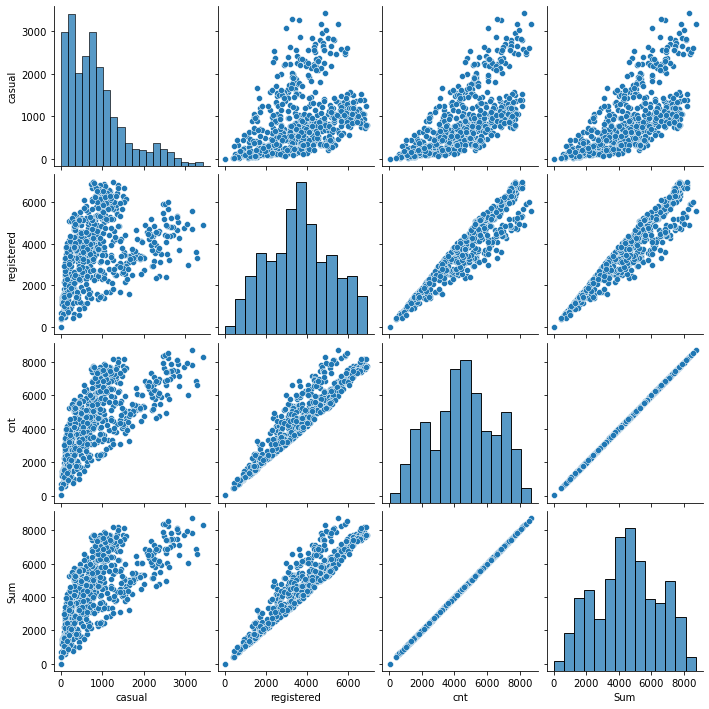

In [18]:
sns.pairplot(df_total) # Cnt and sum is having strong co relation 

In [19]:
# Lets check co relation 
df_total.corr() # Cnt and sum is having co relation as 1  Hence can be removed form the data set 

,casual,registered,cnt,Sum
casual,1.000000,0.394137,0.672123,0.672123
registered,0.394137,1.000000,0.945411,0.945411
cnt,0.672123,0.945411,1.000000,1.000000
Sum,0.672123,0.945411,1.000000,1.000000


<AxesSubplot:>

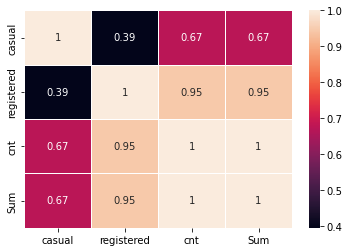

In [20]:
# Lets create heat map 
sns.heatmap(df_total.corr(),annot=True,linewidths=1) # linewidths Gap between boxes , annot= Values inside box 

# Remove  features 


In [21]:
# Instant , datetime , casual ,registered which are not contributing to data set 

In [22]:
data.shape

(730, 16)

In [23]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [24]:
data.shape # 4 features removed 

(730, 12)

In [25]:
data.head(12)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


# Change the name in catgeory 

In [26]:
# data.season.value_counts() # Values are ranging from 1 to 4 
data.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'),inplace=True)
data.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)
data.weathersit.replace((1,2,3,4),('Good','Avg','Bad','Very Bad'),inplace=True)


In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


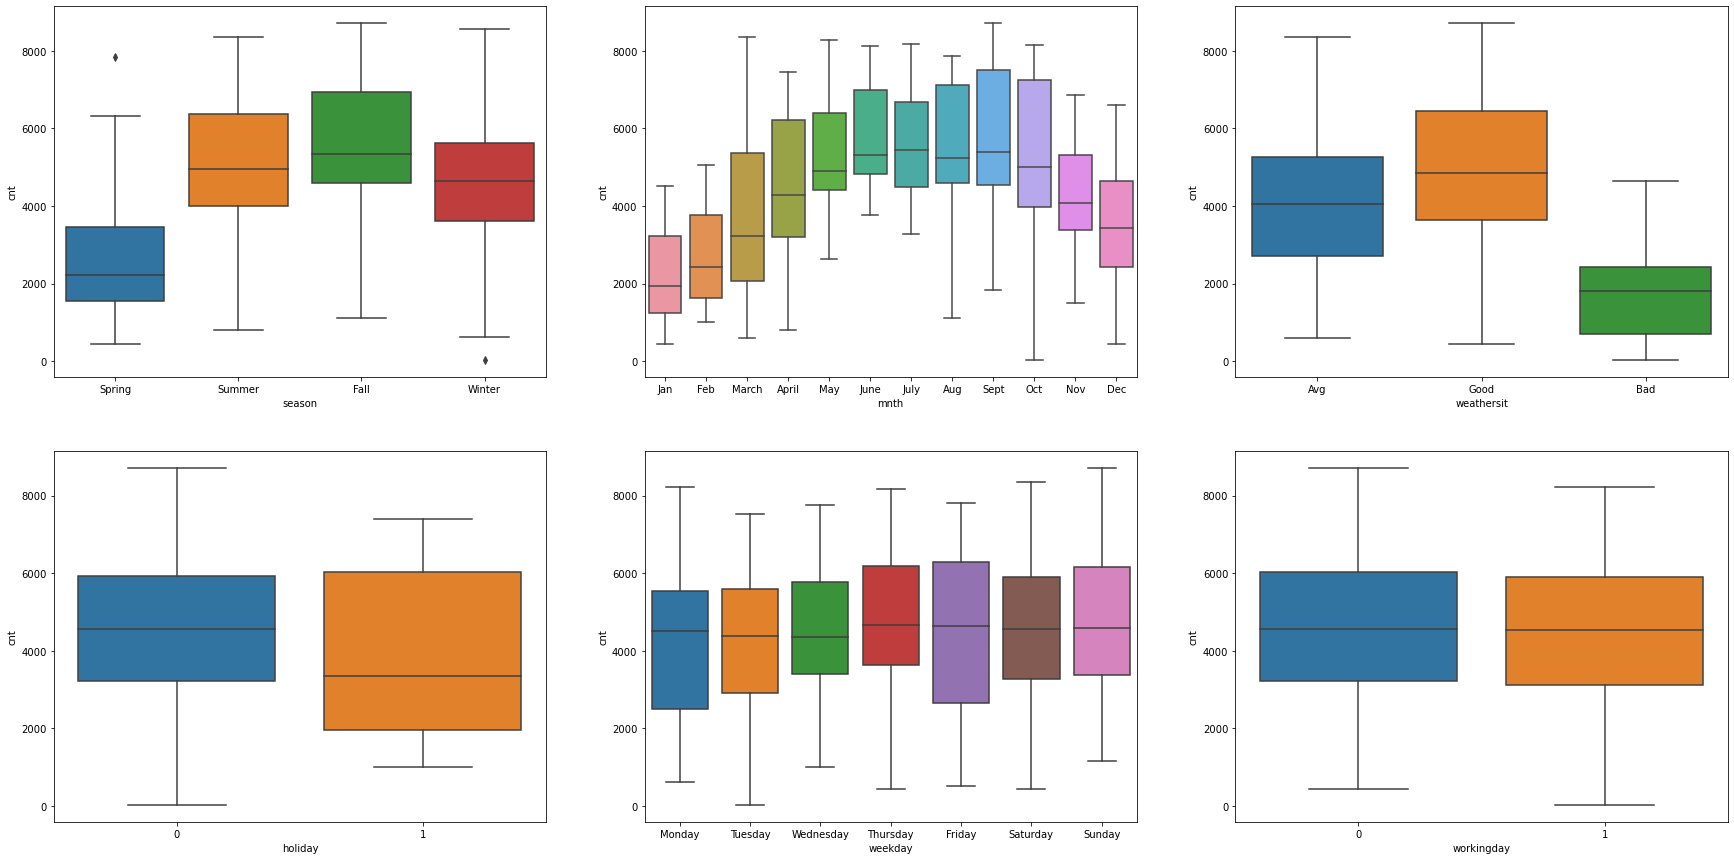

In [28]:
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.show()

In [29]:
#def stats(col):
col_df=data.groupby('season')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


In [30]:
data.cnt.sum()

3290845

In [31]:
col_df['sum']

season
Fall      1061129
Summer     918589
Winter     841613
Spring     469514
Name: sum, dtype: int64

<AxesSubplot:xlabel='season', ylabel='cnt'>

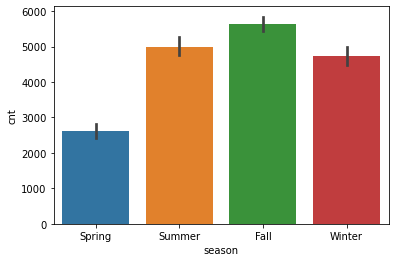

In [32]:
sns.barplot('season','cnt',data=data)

In [33]:
col_df=data.groupby('mnth')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100

col_df.round(2)

,sum,mean,count,persum,percount
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
June,346342,5772.37,60,10.52,8.22
Sept,345991,5766.52,60,10.51,8.22
July,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
April,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
March,228920,3692.26,62,6.96,8.49


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

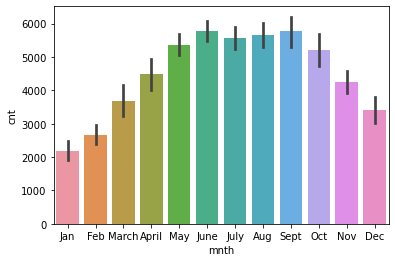

In [34]:
sns.barplot('mnth','cnt',data=data)

In [35]:
col_df=data.groupby('weathersit')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
weathersit,,,,,
Good,2257952,4876.79,463,68.61,63.42
Avg,995024,4044.81,246,30.24,33.70
Bad,37869,1803.29,21,1.15,2.88


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

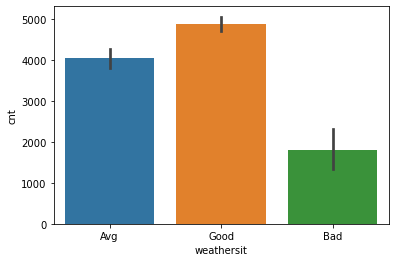

In [36]:
sns.barplot('weathersit','cnt',data=data)

In [37]:
 col_df=data.groupby('weekday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

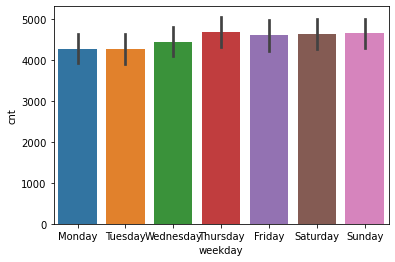

In [38]:
sns.barplot('weekday','cnt',data=data)

In [39]:
 col_df=data.groupby('holiday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

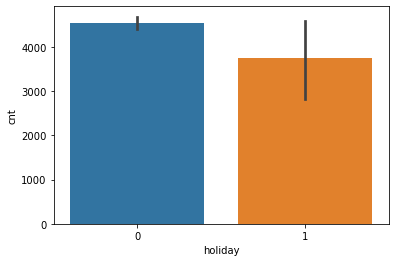

In [40]:
sns.barplot('holiday','cnt',data=data)

In [41]:
 col_df=data.groupby('workingday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

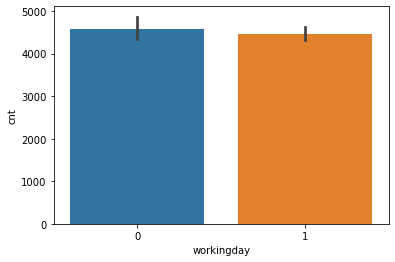

In [42]:
sns.barplot('workingday','cnt',data=data)

In [43]:
 col_df=data.groupby('yr')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending=False)
col_df['persum']=col_df['sum']/data.cnt.sum()*100
col_df['percount']=col_df['count']/data.cnt.count()*100
col_df.round(2)

,sum,mean,count,persum,percount
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


<AxesSubplot:xlabel='yr', ylabel='cnt'>

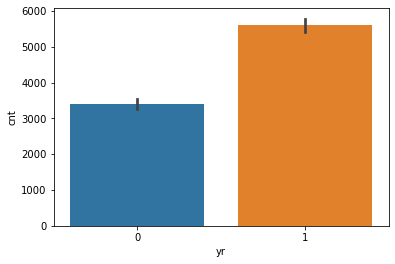

In [44]:
sns.barplot('yr','cnt',data=data)

In [45]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [46]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [47]:
# Numaric varaible are temp	atemp	hum	windspeed	cnt
numaric_data=data[['temp','atemp','hum','windspeed','cnt']]
numaric_data

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


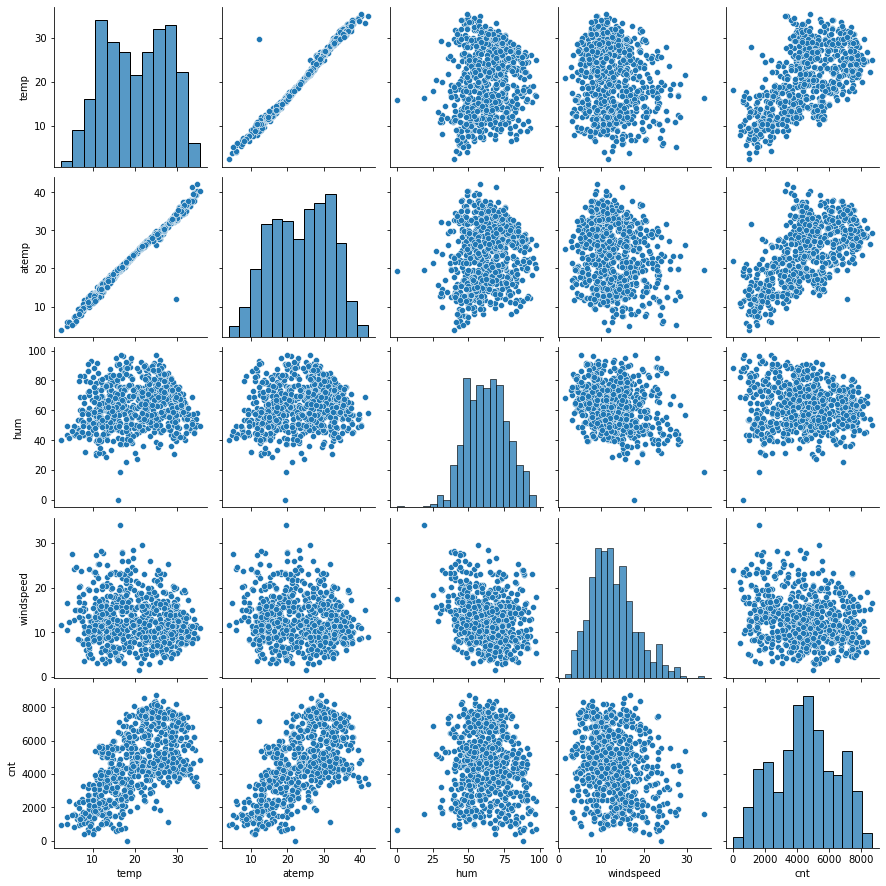

In [48]:
sns.pairplot(numaric_data)
plt.show()

In [49]:
numaric_data.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

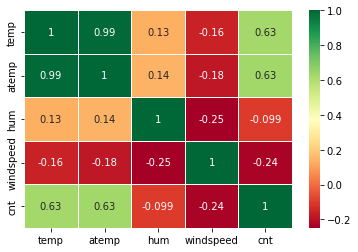

In [50]:
sns.heatmap(numaric_data.corr(),annot=True,cmap="RdYlGn",linewidths=1)

# temp and atemp are strongly corelated and need to select any one of them based on VIF 

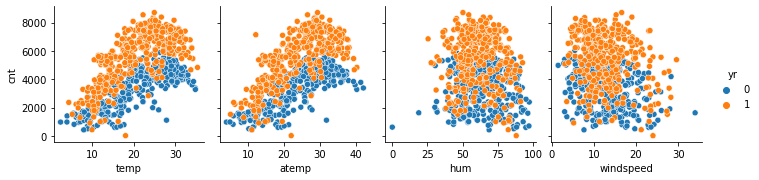

In [51]:
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars=['cnt'],data=data,hue='yr')
# Impact of year , Cat Variable against cnt increase in count 

In [52]:
# Create Dataframe for Cat variable - Get Dummies 

In [53]:
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [54]:
season=pd.get_dummies(data['season'],drop_first=True) # Falls Drop Out 
weather=pd.get_dummies(data['weathersit'],drop_first=True) # Avg Dropout 
month=pd.get_dummies(data['mnth'],drop_first=True) # April Dropped 
weekday=pd.get_dummies(data['weekday'],drop_first=True) # Friday Got dropped 

# Droping frsit column is avoid Dummy Variable trap 


In [55]:
# Merge these data Frames 
data_new=pd.concat([data,season,weather,month,weekday],axis=1)
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Avg,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Avg,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_new.shape

(730, 34)

In [57]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  Bad         730 non-null    uint8  
 16  Good        730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Dec         730 non-null    uint8  
 19  Feb         730 non-null    u

In [58]:
# Delete unwanted columns - Season ,month ,weekday,weather as data is populated in the data frame through get dummies 
data_new.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
data_new


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,0,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,1,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
data_new.shape # Earlier 34 features were present 

(730, 30)

In [60]:
#data_new.info()

# Spliting the data for Training and Testing 

In [61]:
bike_train,bike_test=train_test_split(data_new,train_size=0.7,random_state=42)

In [62]:
bike_train.shape

(510, 30)

In [63]:
bike_test.shape

(220, 30)

# Scaling 

In [64]:
scaler=MinMaxScaler()
# Sclaer need to apply on numaric data and not on Encoded data . Need to create another varaible for Scaling 
num_var=['temp','atemp','hum','windspeed','cnt']
print(num_var)
bike_train[num_var]=scaler.fit_transform(bike_train[num_var])

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [65]:
bike_train.head(3) # Minmax applied on the dataset for numaric column 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
# Lets check co -relation coeff for data set after scaling 


<AxesSubplot:>

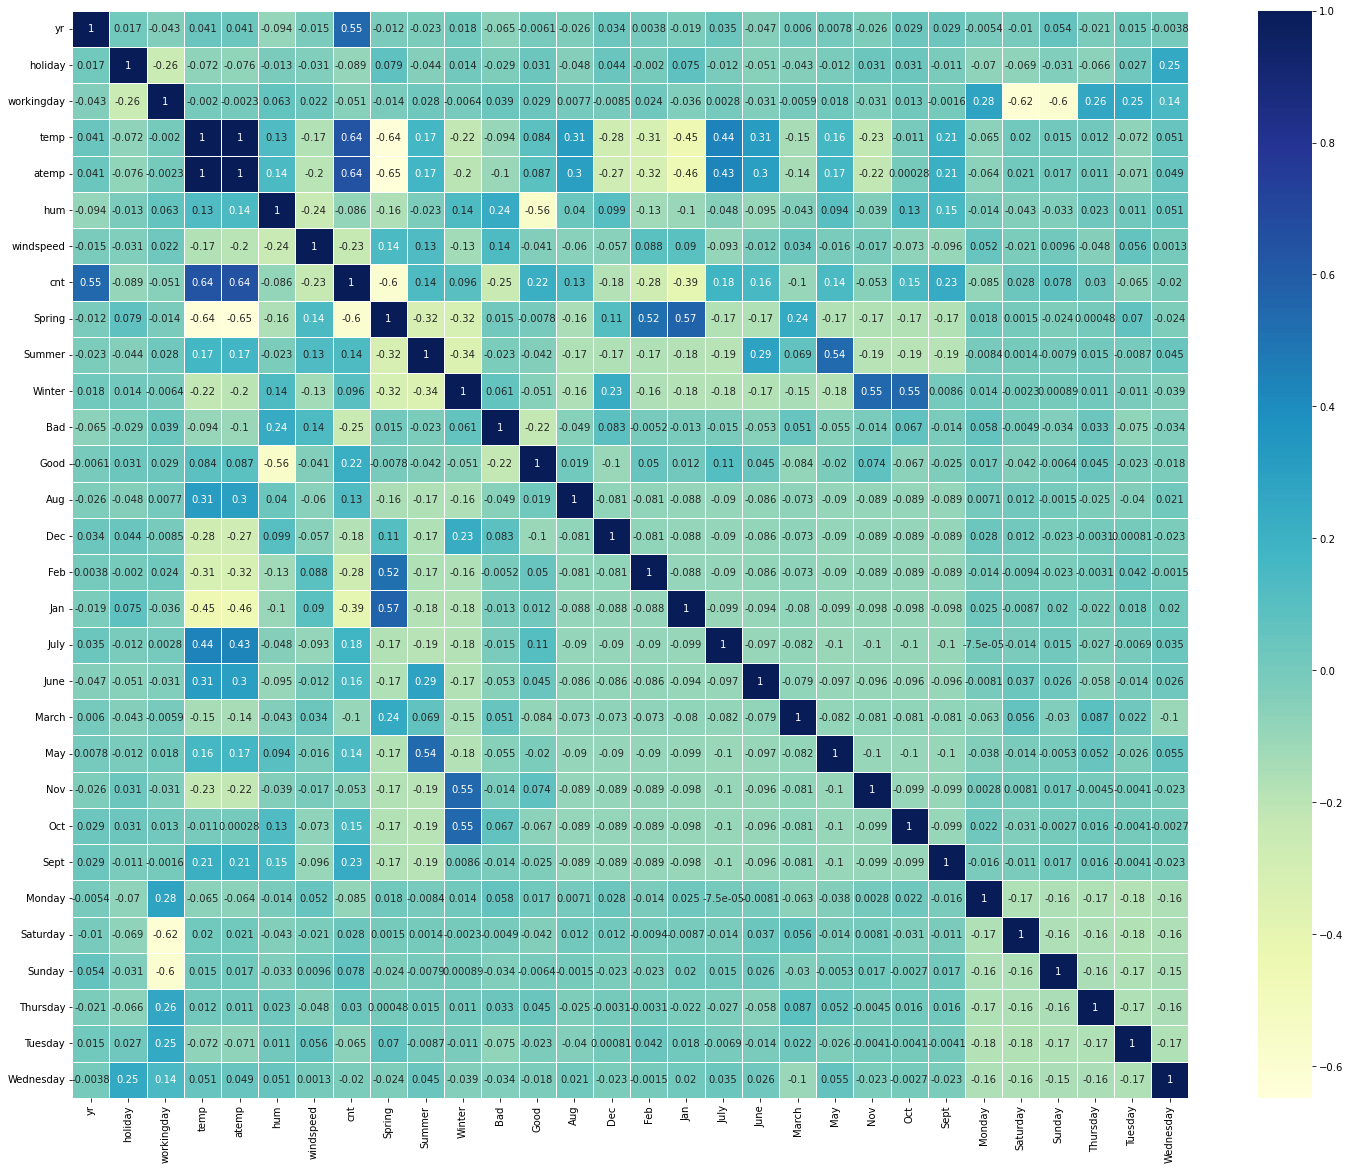

In [67]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_train.corr(),annot=True,cmap='YlGnBu',linewidths=1)

# Insights 

- Temp and atemp have strong corelation ** 
- Working day Saturday and Sunday have - ve corelatioship -0.62 and 0.6 ** 
- Spring and count having - ve corelation -0.6 # 
- Temp and atemp + ve corelation with cnt 0.64 # 
- Humidity and Good wather condition is having corelation 0.6 ** 
-

In [ ]:
# VIF Calculation


In [84]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Bad', 'Good', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

# Moel Building 

In [68]:
y_train=bike_train.pop('cnt')
X_train=bike_train

X_test=bike_test
y_test=bike_test.pop('cnt')

In [69]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,0,0,0,1
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,0,0,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,1,0,0,0,0,1,0,0
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [70]:
y_train.shape # y train 

(510,)

In [71]:
X_train.shape # X train Matching 

(510, 29)

# Model Building 

# 4.1.1 - Linear Regression


In [72]:
#Decision Tree
DTmodel = DecisionTreeRegressor(max_depth=3,splitter='best',random_state=10,max_features=None)
DTmodel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [73]:
Y_pred=DTmodel.predict(X_test)

In [80]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 23123417.377118632


In [82]:
# Calculate the mean Absolute Error of the prediction
mae = mean_absolute_error(y_test, Y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4407.399692622782


In [83]:
# Calculate the Rsquare value of the prediction
r2 = r2_score(y_test, Y_pred)
print("R-squared:", r2)

R-squared: -5.251927931879749


In [74]:
model=LinearRegression() # # https://www.youtube.com/watch?v=POCvLGRLDzM
rfe=RFE(model)
fit=rfe.fit(X_train,y_train)


In [75]:
fit.n_features_

14

In [76]:
fit.support_

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [77]:
fit.ranking_


array([ 1,  1, 11,  1,  1,  1,  1,  1,  8,  1,  1,  1, 13,  1,  9, 15,  1,
       10,  2,  3,  1,  4,  1,  5, 12, 14, 16,  7,  6])

In [78]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Bad', 'Good', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')